In [6]:
import matplotlib.pyplot as plt
import json
from pathlib import Path
import numpy as np
import os

%matplotlib widget

### Directions for plotting times

Replace `experiment_folder` with the path to the logs folder of interest that contains the client and args JSON files.

In [ ]:
experiment_folder = 'logs/test1'

client_files = list(Path(experiment_folder).glob('client-*.json'))

{'exp_name': 'test1', 'run_time': 60, 'prob_internal': 0.7, 'clock_speeds': [6, 5, 1]}


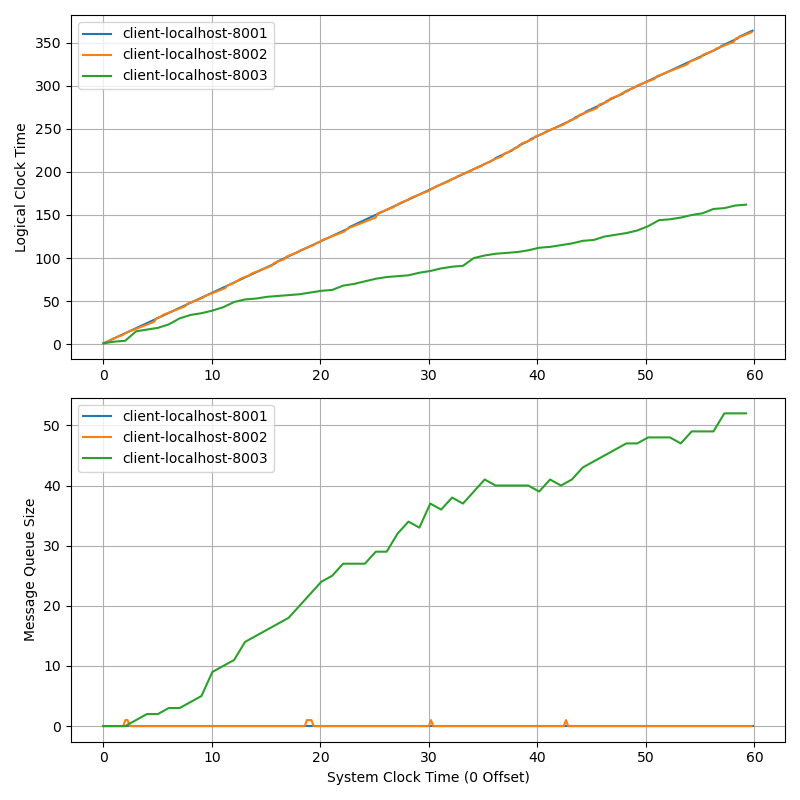

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

axes[0].set_ylabel('Logical Clock Time')
axes[1].set_xlabel('System Clock Time (0 Offset)')
axes[1].set_ylabel('Message Queue Size')

# Print the args.json in this folder
with open(Path(experiment_folder) / 'args.json') as f:
    print(json.load(f))

# Load JSON for each file
for client_file in client_files:
    # Get name of file (without extension)
    name = client_file.stem

    with open(client_file) as f:
        data = json.load(f)
        # Extract values
        sys_time = np.array([d['system_clock_time'] for d in data])
        log_time = np.array([d['logical_clock_time'] for d in data])
        msg_queue_size = np.array([d.get('message_queue_size', 0) for d in data])  # Default to 0 if missing
        # Normalize system time (set first timestamp as zero)
        sys_time -= sys_time[0]

        # Plot Logical Clock Time vs. System Clock Time
        axes[0].plot(sys_time, log_time, label=name)

        # Plot Message Queue Size vs. System Clock Time
        axes[1].plot(sys_time, msg_queue_size, label=name)

# Add legends
axes[0].legend()
axes[1].legend()

# add grids
axes[0].grid()
axes[1].grid()

# Show the figure
plt.tight_layout()